In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open("icecube_10year_ps/irfs/IC59_smearing.csv", 'r') as f2:
    lines = f2.readlines()
content=[]
column=lines[0].split()
column.pop(0)
for line in lines[1:]:
    
    content.append(line.split())

smear = pd.DataFrame(content, columns = column)
smear

,log10(E_nu/GeV)_min,log10(E_nu/GeV)_max,Dec_nu_min[deg],Dec_nu_max[deg],log10(E/GeV)_min,log10(E/GeV)_max,PSF_min[deg],PSF_max[deg],AngErr_min[deg],AngErr_max[deg],Fractional_Counts
0,2.00,2.50,-90.00,-10.000,0.000,0.000,0.000e+00,0.000e+00,0.00e+00,0.00e+00,0.0000e+00
1,2.00,2.50,-90.00,-10.000,0.000,0.000,0.000e+00,0.000e+00,0.00e+00,0.00e+00,0.0000e+00
2,2.00,2.50,-90.00,-10.000,0.000,0.000,0.000e+00,0.000e+00,0.00e+00,0.00e+00,0.0000e+00
3,2.00,2.50,-90.00,-10.000,0.000,0.000,0.000e+00,0.000e+00,0.00e+00,0.00e+00,0.0000e+00
4,2.00,2.50,-90.00,-10.000,0.000,0.000,0.000e+00,0.000e+00,0.00e+00,0.00e+00,0.0000e+00
...,...,...,...,...,...,...,...,...,...,...,...
369595,8.50,9.00,10.00,90.000,7.597,7.830,6.935e+01,1.095e+02,1.81e+00,2.10e+00,0.0000e+00
369596,8.50,9.00,10.00,90.000,7.597,7.830,6.935e+01,1.095e+02,2.10e+00,2.43e+00,0.0000e+00
369597,8.50,9.00,10.00,90.000,7.597,7.830,6.935e+01,1.095e+02,2.43e+00,2.81e+00,0.0000e+00
369598,8.50,9.00,10.00,90.000,7.597,7.830,6.935e+01,1.095e+02,2.81e+00,3.25e+00,0.0000e+00


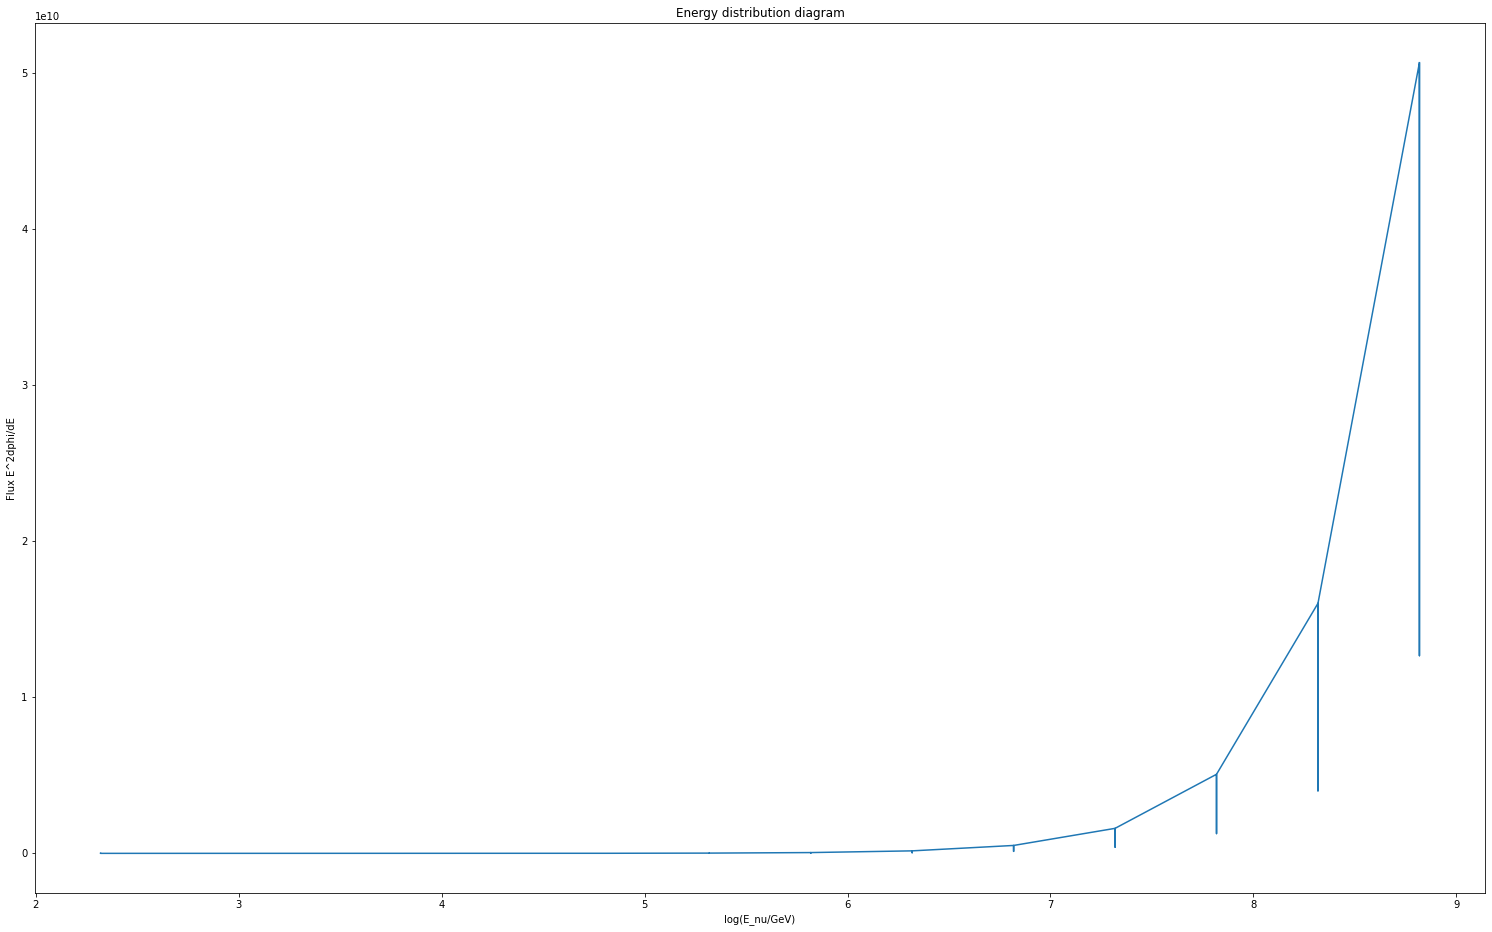

In [6]:
de = [pow(10,float(smear['log10(E_nu/GeV)_max'][i])) - pow(10,float((smear['log10(E_nu/GeV)_min'][i]))) for i in range(0,len(smear['log10(E_nu/GeV)_max']))]
dphi = [float(smear['Dec_nu_max[deg]'][i]) - float((smear['Dec_nu_min[deg]'][i])) for i in range(0,len(smear['Dec_nu_max[deg]']))]
#print(de)
#print(de)

e = [((pow(10,float(smear['log10(E_nu/GeV)_max'][i])) + pow(10,float((smear['log10(E_nu/GeV)_min'][i]))))/2.0) for i in range(0,len(smear['log10(E_nu/GeV)_max']))]
e2 = [pow((pow(10,float(smear['log10(E_nu/GeV)_max'][i])) + pow(10,float((smear['log10(E_nu/GeV)_min'][i]))))/2.0,2) for i in range(0,len(smear['log10(E_nu/GeV)_max']))]
e2dphide = [e2[i] * dphi[i]/de[i] for i in range(0,len(smear['log10(E_nu/GeV)_max']))]


plt.figure(figsize=(26,16))
plt.xlabel("log(E_nu/GeV)")
plt.ylabel("Flux E^2dphi/dE")
plt.title("Energy distribution diagram")
plt.plot(np.log10(e),e2dphide)
plt.show()
